Original shape: (1797, 64)
Reduced shape: (1797, 25)
Explained variance ratio: [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316]


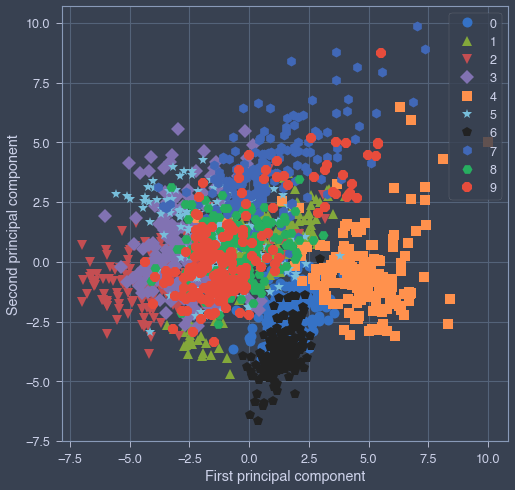

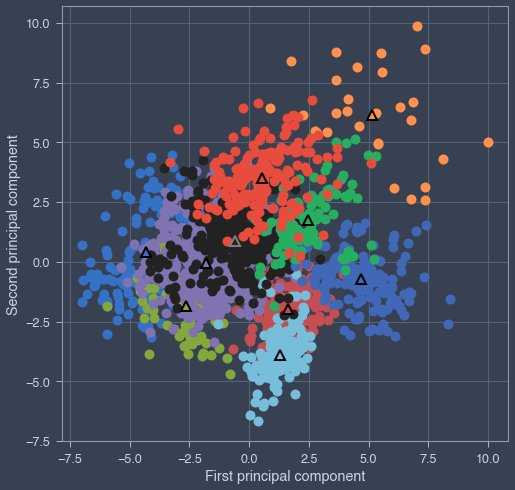

In [2]:
# Shape of digits data: 1797*64
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
import mglearn

digits = load_digits()
scaler = StandardScaler() 
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)
num_class = 10 

from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=0.85, svd_solver = 'full')
# fit PCA model to breast cancer data 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], digits.target) 
plt.legend(digits.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

from sklearn.cluster import KMeans

# build the clustering model
pca_kmeans = KMeans(n_clusters=num_class, random_state=17, n_init=100) 
pca_kmeans.fit(X_pca)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], pca_kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1, 2,3,4,5,6,7,8,9], markers='^', markeredgewidth=2)

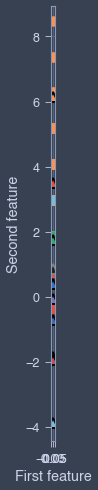

In [3]:
kmeans = KMeans(n_clusters=10, random_state = 17, n_init=100) 
kmeans.fit(X_scaled)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1, 2,3,4,5,6,7,8,9], markers='^', markeredgewidth=2)

In [4]:
from sklearn.metrics.cluster import fowlkes_mallows_score
from purity import purity_score

labels_true = digits.target
labels_pred = kmeans.labels_
pca_labels_pred = pca_kmeans.labels_

print(fowlkes_mallows_score(labels_true, labels_pred))
print(fowlkes_mallows_score(labels_true, pca_labels_pred))

0.5347392087783384
0.5308228527933626


In [5]:


print(purity_score(labels_true, labels_pred))
print(purity_score(labels_true, pca_labels_pred))

0.6232609905397886
0.6188091263216472


In [6]:
from sklearn.metrics.cluster import adjusted_rand_score

print(adjusted_rand_score(labels_true, labels_pred))
print(adjusted_rand_score(labels_true, pca_labels_pred))


0.46781241472541285
0.4635048313886495
